<a href="https://colab.research.google.com/github/hikmatilloahatov/Azarbaijan-supermarkets-data-visualizations/blob/main/Ma%C5%9F%C4%B1n_bazar%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2019-yil uchun "Maşın bazarı" supermarketidagi savdo holati


In [2]:
#1 Barcha kerakli kutubxonalarni chaqirib olamiz
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [3]:
#2 Kerakli datasetni githubdan df o'zgaruvchisiga yuklab olaman.
df = pd.read_csv("https://github.com/hikmatilloahatov/Azarbaijan-supermarkets-datasets/blob/main/Ma%C5%9F%C4%B1n%20bazar%C4%B1.csv?raw=true", usecols=list(range(1, 6)))
df.head(10)

,mahsulot_nomi,mahsulot_turi,mahsulot_narhi,sotilgan_vaqti,bonus_karta
0,OLEYNA 1LT GUNEBAXAN YAGI,Yog'lar,3.05,2019-01-12,True
1,FANAT 35GR SUXARI QIRMIZI KURULU,Quritilgan mevalar to'plami,0.20,2019-01-12,True
2,SMART 50ML AYAQQABI KREMI LACIVERT,Poyafzal aksessuarlari,5.67,2019-01-12,True
3,MERRY TEMIZLIK BEZI MOP 40SM*2N,"Yuvish vositalari, tozalagichlar",2.32,2019-01-12,True
4,SIGARET LD CLUB EXCEL GOY,Tamaki mahsulotlari,1.80,2019-01-12,True
5,PEYMAN 70GR FLAVOURED MIX SOSLU KAR.CEREZ,Quritilgan mevalar to'plami,2.55,2019-01-12,True
6,RASPAK 500GR KRAXMAL KARTOFELNIY PAKET,Ziravorlar,3.65,2019-01-12,True
7,QARAGOZ 750ML QIRMIZI KEMSIRIN SUFRE SERABI,Vinolar,3.33,2019-01-12,True
8,MECTA XOZYAYKI 800ML MAYONEZ PROVANSAL 67%,Souslar,2.85,2019-03-05,True
9,PASHA GOLDEN 250GR CAY,Choy,4.85,2019-03-05,True


In [4]:
#3 DataFramening barcha ustunlari haqidagi ma'lumotga ega bo'lib olaman
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20924 entries, 0 to 20923
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mahsulot_nomi   20924 non-null  object 
 1   mahsulot_turi   20924 non-null  object 
 2   mahsulot_narhi  20924 non-null  float64
 3   sotilgan_vaqti  20924 non-null  object 
 4   bonus_karta     20924 non-null  bool   
dtypes: bool(1), float64(1), object(3)
memory usage: 674.4+ KB


In [5]:
#4 DataFrameda NaN qiymatlar bor yoki yo'qligini tekshiraman
df.isnull().sum()

mahsulot_nomi     0
mahsulot_turi     0
mahsulot_narhi    0
sotilgan_vaqti    0
bonus_karta       0
dtype: int64

In [6]:
#5 "sotilgan_vaqti" ustunining ma'lumot turini objectdan datetime ma'lumot turiga o'tkazaman
df['sotilgan_vaqti'] = pd.to_datetime(df['sotilgan_vaqti'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20924 entries, 0 to 20923
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   mahsulot_nomi   20924 non-null  object        
 1   mahsulot_turi   20924 non-null  object        
 2   mahsulot_narhi  20924 non-null  float64       
 3   sotilgan_vaqti  20924 non-null  datetime64[ns]
 4   bonus_karta     20924 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), object(2)
memory usage: 674.4+ KB


In [7]:
#6 Har bir oy uchun ma'lumotlar sonini ko'rib olaman
for i in range(1, 13):
  print(df[df['sotilgan_vaqti'].dt.month == i].shape[0])

2097
1845
2109
1900
2172
2062
2181
2225
1976
2336
21
0


In [8]:
#7 Demak tushunamanki, 12-oy uchun hech qanday ma'lumot yo'q, 11-oyda esa bor ammo ma'lumotlar juda oz 
# shuning uchun 11-oydagi ma'lumotlarni tashlab yuborsam bo'laveradi
df.drop(df[df['sotilgan_vaqti'].dt.month == 11].index, axis=0, inplace=True)
for i in range(1, 13):
  print(df[df['sotilgan_vaqti'].dt.month == i].shape[0])

2097
1845
2109
1900
2172
2062
2181
2225
1976
2336
0
0


In [9]:
#8 DataFrameni bir ko'rib olaman
df

,mahsulot_nomi,mahsulot_turi,mahsulot_narhi,sotilgan_vaqti,bonus_karta
0,OLEYNA 1LT GUNEBAXAN YAGI,Yog'lar,3.05,2019-01-12,True
1,FANAT 35GR SUXARI QIRMIZI KURULU,Quritilgan mevalar to'plami,0.20,2019-01-12,True
2,SMART 50ML AYAQQABI KREMI LACIVERT,Poyafzal aksessuarlari,5.67,2019-01-12,True
3,MERRY TEMIZLIK BEZI MOP 40SM*2N,"Yuvish vositalari, tozalagichlar",2.32,2019-01-12,True
4,SIGARET LD CLUB EXCEL GOY,Tamaki mahsulotlari,1.80,2019-01-12,True
...,...,...,...,...,...
20919,BRIDEL 500GR AG PENDIR T/P,Pishloqlar,3.55,2019-08-02,False
20920,KONFET NEV.KON.LUQOVAYA MU SOKOLADLI KG,Shirinliklar,5.80,2019-06-03,True
20921,HEINZ 1000GR KETCUP TOMATNIY OSTRIY PL/Q,Souslar,5.20,2019-06-03,True
20922,SARMA 500ML QABYUYAN MAYE ORIGINAL GEL,Idish yuvish vositalari,2.07,2019-06-03,True


In [10]:
#9 2019-yilda "Maşın bazarı" supermarketida qaysi mahsulot turi nechta sotilgani haqida ma'lumotlarni olaman
df['mahsulot_turi'].value_counts().to_frame()

,mahsulot_turi
Shirinliklar,4840
Maishiy buyumlar,1167
"Yuvish vositalari, tozalagichlar",1047
Mevali sharbatlar,929
Idish-tovoq,788
...,...
Qaymoq,20
Shampan,17
Tayyor ovqatlar,16
Muzlatilgan mahsulotlar,3


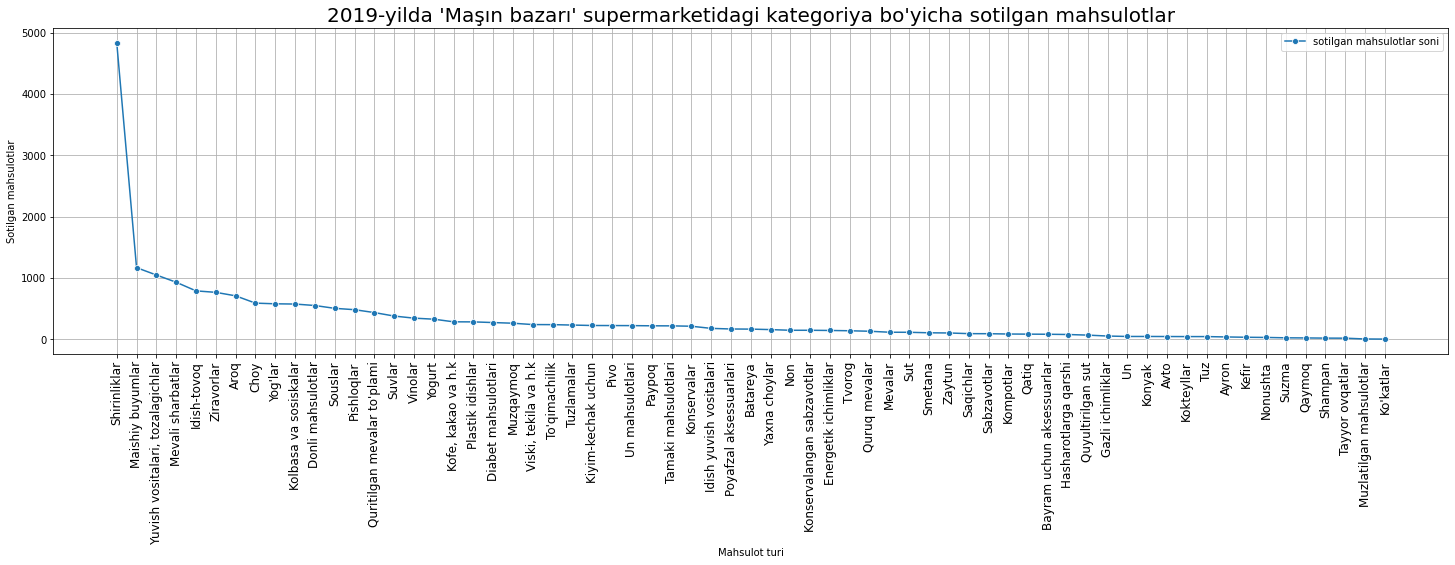

In [11]:
#9 Visualization
plt.figure(figsize=(25, 6))
sns.lineplot(data=df['mahsulot_turi'].value_counts().to_frame(), markers="o")

plt.xlabel("Mahsulot turi")
plt.ylabel("Sotilgan mahsulotlar")
plt.title("2019-yilda 'Maşın bazarı' supermarketidagi kategoriya bo'yicha sotilgan mahsulotlar", fontsize=20)

plt.grid()
plt.legend(["sotilgan mahsulotlar soni"])
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [12]:
#10 2019-yilda "Maşın bazarı" supermarketida qaysi mahsulot turi qancha pul olib kelgani haqida ma'lumotni olaman
df.pivot_table(index=['mahsulot_turi'],
              values=['mahsulot_narhi'], 
              aggfunc=['sum'])

,sum
,mahsulot_narhi
mahsulot_turi,
Aroq,10301.77
Avto,219.47
Ayron,21.67
Batareya,612.35
Bayram uchun aksessuarlar,236.68
...,...
Yog'lar,5190.74
Yogurt,404.85


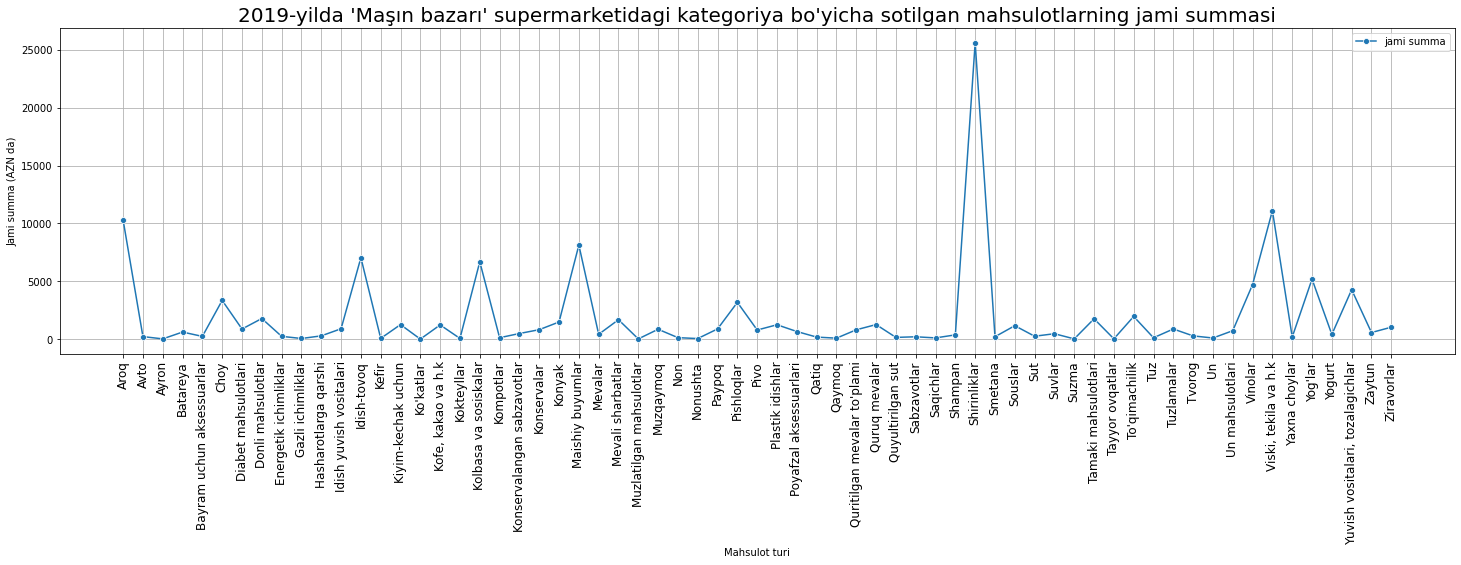

In [13]:
#10 Visualization
plt.figure(figsize=(25, 6))
sns.lineplot(data=df.pivot_table(index=['mahsulot_turi'], values=['mahsulot_narhi'], aggfunc=['sum']),
             markers="o")

plt.xlabel("Mahsulot turi")
plt.ylabel("Jami summa (AZN da)")
plt.title("2019-yilda 'Maşın bazarı' supermarketidagi kategoriya bo'yicha sotilgan mahsulotlarning jami summasi", fontsize=20)

plt.grid()
plt.legend(["jami summa"])
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [14]:
#11 2019-yilda "Maşın bazarı" supermarketida nechta mijoz mahsulotni bonus karta orqali 
# xarid qilgan yoki qilmagani haqida haqida ma'lumotni olaman
bonus_df = df['bonus_karta'].value_counts().to_frame().T
bonus_df.columns = ["Bonus_kartasiz", "Bonus_karta_orqali"]
bonus_df.index = pd.Index(['xaridlar'])
bonus_df

,Bonus_kartasiz,Bonus_karta_orqali
xaridlar,10964,9939


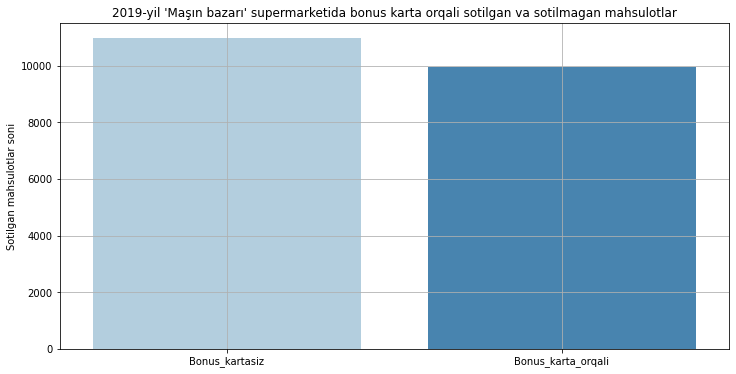

In [15]:
#11 Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=bonus_df, palette="Blues")

plt.title("2019-yil 'Maşın bazarı' supermarketida bonus karta orqali sotilgan va sotilmagan mahsulotlar")
plt.ylabel("Sotilgan mahsulotlar soni")

plt.grid()
plt.show()

In [16]:
#12 2019-yilda "Maşın bazarı" supermarketida oylarga nisbatan xaridlar soni haqida ma'lumotlarni aniqlab olaman
oylik_xaridlar = list()
oy_nomlari = ['Yanvar', 'Fevral', 'Mart', 'Aprel', 'May', 'Iyun', 'Iyul', 'Avgust', 'Sentabr', 'Oktabr']
for i in range(1, 11):
  oylik_xaridlar.append(df[df['sotilgan_vaqti'].dt.month == i].shape[0])
df1 = pd.DataFrame(index=oy_nomlari, data=oylik_xaridlar, columns=['oylik_xaridlar'])
df1

,oylik_xaridlar
Yanvar,2097
Fevral,1845
Mart,2109
Aprel,1900
May,2172
Iyun,2062
Iyul,2181
Avgust,2225
Sentabr,1976
Oktabr,2336


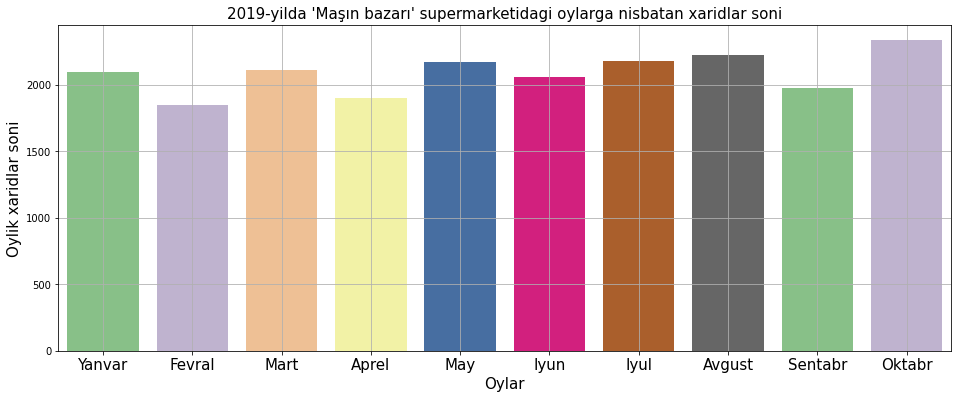

In [17]:
#12 Visualization
plt.figure(figsize=(16, 6))
sns.barplot(x=df1.index, y=df1['oylik_xaridlar'], palette='Accent')

plt.title("2019-yilda 'Maşın bazarı' supermarketidagi oylarga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Oylar", fontsize=15)
plt.ylabel("Oylik xaridlar soni", fontsize=15)

plt.xticks(fontsize=15)
plt.grid()
plt.show()

In [18]:
#13 2019-yilda "Maşın bazarı" supermarketida hafta kunlariga nisbatan xaridlar soni
hafta_kunlari_xaridlar = list()
kun_nomlari = ['Dushanba', 'Seshanba', 'Chorshanba', 'Payshanba', 'Juma', 'Shanba', 'Yakshanba']
for i in range(0, 7):
  hafta_kunlari_xaridlar.append(df[df['sotilgan_vaqti'].dt.weekday == i].shape[0])
df2 = pd.DataFrame(index=kun_nomlari, data=hafta_kunlari_xaridlar, columns=['xaridlar'])
df2

,xaridlar
Dushanba,3131
Seshanba,2930
Chorshanba,2911
Payshanba,2702
Juma,3032
Shanba,2950
Yakshanba,3247


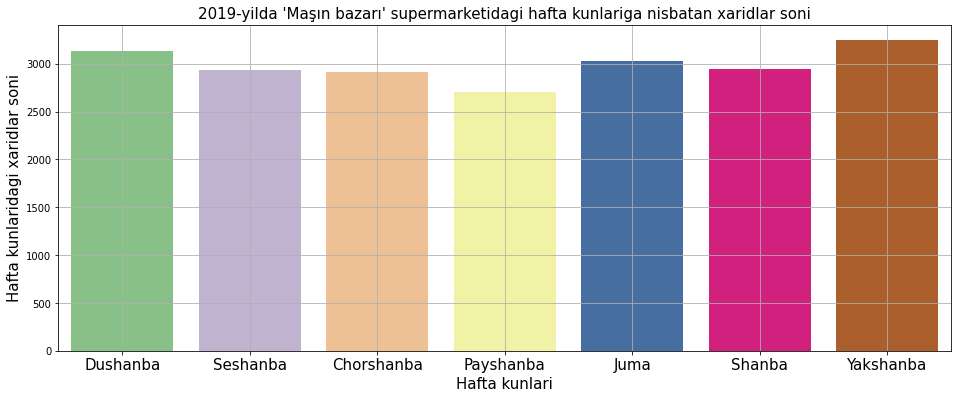

In [19]:
#13 Visualization
plt.figure(figsize=(16, 6))
sns.barplot(x=df2.index, y=df2['xaridlar'], palette='Accent')

plt.title("2019-yilda 'Maşın bazarı' supermarketidagi hafta kunlariga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Hafta kunlari", fontsize=15)
plt.ylabel("Hafta kunlaridagi xaridlar soni", fontsize=15)

plt.xticks(fontsize=15)
plt.grid()
plt.show()

In [20]:
#14 2019-yilda "Maşın bazarı" supermarketida oy kunlariga nisbatan xaridlar soni haqida ma'lumotlarni aniqlab olaman
oy_kunlari_xaridlar = list()
kunlar = list(range(1, 32))
for i in range(1, 32):
  oy_kunlari_xaridlar.append(df[df['sotilgan_vaqti'].dt.day == i].shape[0])
df3 = pd.DataFrame(index=kunlar, data=oy_kunlari_xaridlar, columns=['xaridlar'])
df3

,xaridlar
1,697
2,671
3,686
4,764
5,719
6,576
7,829
8,605
9,711
10,738


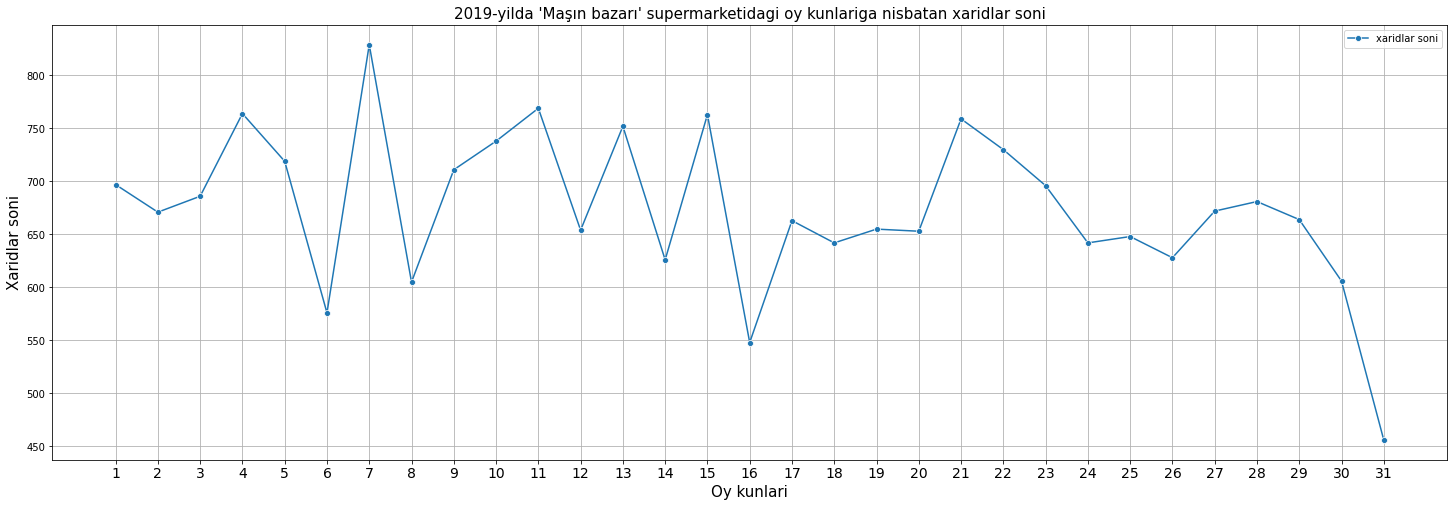

In [21]:
#14 Visualization
plt.figure(figsize=(25, 8))
sns.lineplot(data=df3, markers="o")

plt.title("2019-yilda 'Maşın bazarı' supermarketidagi oy kunlariga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Oy kunlari", fontsize=15)
plt.ylabel("Xaridlar soni", fontsize=15)

plt.legend(["xaridlar soni"])
plt.grid()
plt.xticks(kunlar, fontsize=14)
plt.show()

In [22]:
#15 2019-yil 'Maşın bazarı' supermarketidagi har bir oyning har bir kunidagi xaridlar sonini aniqlab olaman
# buning uchun while loopdan foydalandim
oy_sanalari = list()
oy = 1
kun = 1
while kun<=31 and oy<=10:
    oy_sanalari.append(df[(df['sotilgan_vaqti'].dt.month == oy) & (df['sotilgan_vaqti'].dt.day == kun)].shape[0])
    kun +=1
    if kun == 32:
        oy+=1
        kun=1

In [23]:
len(oy_sanalari)

310

In [24]:
arr = np.array(oy_sanalari).reshape(10, 31)

In [25]:
df5 = pd.DataFrame(index=oy_nomlari, data=arr, columns=list(range(1, 32)))

In [26]:
df5

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
Yanvar,83,60,53,58,46,70,91,60,75,74,62,57,67,113,101,43,40,43,97,95,67,98,86,51,72,65,59,35,75,58,43
Fevral,65,58,83,58,71,51,47,85,71,128,62,60,83,39,56,73,72,56,45,26,60,57,64,105,89,67,57,57,0,0,0
Mart,88,48,73,83,81,37,69,79,80,55,42,60,74,56,86,74,96,57,50,58,100,86,70,63,109,28,34,50,76,58,89
Aprel,86,87,61,70,78,65,78,41,64,95,87,65,51,68,95,68,41,26,60,28,65,93,35,43,16,85,58,78,51,62,0
May,93,94,84,96,85,52,49,29,68,74,69,85,117,72,52,50,40,82,52,71,58,42,80,95,49,15,122,83,55,61,98
Iyun,86,50,66,75,64,62,66,51,100,51,87,83,77,54,88,47,50,56,96,60,106,61,111,41,32,73,69,59,66,75,0
Iyul,74,43,79,62,98,54,87,57,63,47,104,79,83,55,43,45,48,66,78,60,45,96,87,81,74,73,64,77,110,63,86
Avgust,31,83,81,82,72,54,107,52,51,66,85,62,65,45,77,77,111,125,54,82,71,64,55,67,62,95,68,95,47,81,58
Sentabr,30,76,53,117,40,71,110,76,99,69,110,55,56,79,53,27,80,76,57,75,71,67,33,36,68,55,22,65,83,67,0
Oktabr,61,72,53,63,84,60,125,75,40,79,61,48,79,45,112,44,85,55,66,98,116,66,75,60,77,72,119,82,101,81,82


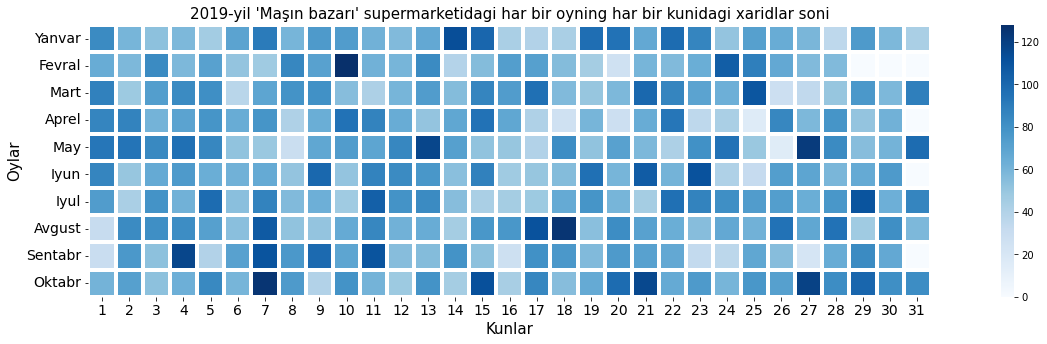

In [27]:
#15 Visualisation
plt.figure(figsize=(25, 5))
sns.heatmap(data=df5, linewidth=3, cmap="Blues", square=True)

plt.title("2019-yil 'Maşın bazarı' supermarketidagi har bir oyning har bir kunidagi xaridlar soni", fontsize=15)
plt.xlabel("Kunlar", fontsize=15)
plt.ylabel("Oylar", fontsize=15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

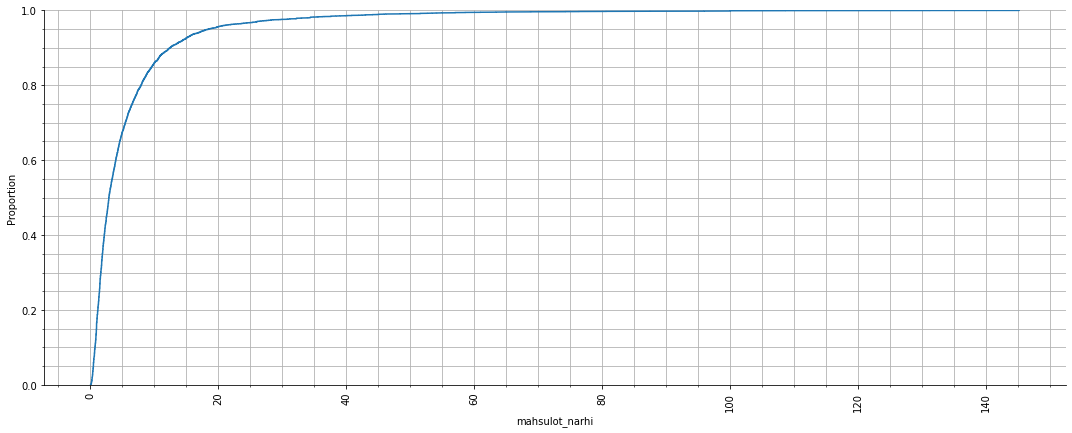

In [29]:
#16 Ko'rinadiki, sotilgan mahsulotlarning 50% i 3 azngacha, 90% i esa 14 azngacha bo'lgan mahsulotlar
sns.displot(data=df, x='mahsulot_narhi', kind='ecdf', height=6, aspect=2.5)
plt.xticks(rotation=90)
plt.grid(which='both')
plt.minorticks_on()
plt.show()